<a href="https://colab.research.google.com/github/rodjfg/los-fabulosos-pixelotls/blob/master/Example_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install --quiet git+https://github.com/rodjfg/los-fabulosos-pixelotls

In [11]:
from los_fabulosos_pixelotls.tools import load_raw_data, select_by_areas, select_by_contrast, select_trials, calculate_mean_firing_rate
import numpy as np
from matplotlib import rcParams 
from matplotlib import pyplot as plt

rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True



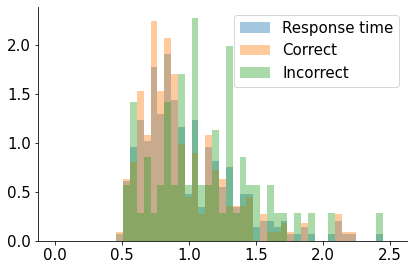

In [17]:
list_responses_correct=[]
list_responses_incorrect = []
list_cue=[]
list_responses=[]

for dat in alldat:
  right_stim_correct_trials = select_trials(dat, contrast_pair=(0.25,0.5), response_type='to_left')
  right_stim_incorrect_trials = select_trials(dat,contrast_pair=(0.25,0.5), response_type='to_right')
  list_responses_correct.extend(dat['response_time'][right_stim_correct_trials].flatten())
  list_responses_incorrect.extend(dat['response_time'][right_stim_incorrect_trials].flatten())
  list_responses.extend(dat['response_time'][right_stim_correct_trials + right_stim_incorrect_trials].flatten())
  list_cue.extend(dat['gocue'].flatten())
plt.hist(list_responses, bins=np.linspace(0,2.5,50),label='Response time', alpha=0.4, density=True)
plt.hist(list_responses_correct, bins=np.linspace(0,2.5,50),alpha=0.4,label='Correct', density=True)
plt.hist(list_responses_incorrect, bins=np.linspace(0,2.5,50),alpha=0.4,label='Incorrect', density=True)
#plt.hist(list_cue, bins=np.linspace(0,2.5,50),alpha=0.7,label='GoCue')

plt.legend()
right_stim_correct_trials = select_trials(dat, contrast_pair=(0,1), response_type='to_left')
right_stim_incorrect_trials = select_trials(dat,contrast_pair=(0,1), response_type='to_right')




In [19]:
# get data
alldat = load_raw_data()

# name conventions
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate", "other"]
region_colors = ['blue', 'red', 'green', 'darkblue', 'violet', 'lightblue', 'orange', 'gray']
brain_groups = [
    ["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
    ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
    ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
    ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP","TT"], # non-visual cortex
    ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
    ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
    ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
    ]



/usr/local/lib/python3.7/dist-packages/los_fabulosos_pixelotls/tools.py:153: RuntimeWarning: Mean of empty slice.
  mean_firing_rate = 1/dt * spks.mean(axis=axis_to_mean)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/los_fabulosos_pixelotls/tools.py:153: RuntimeWarning: Mean of empty slice.
  mean_firing_rate = 1/dt * spks.mean(axis=axis_to_mean)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/los_fabulosos_pixelotls/tools.py:153: RuntimeWarning: Mean of empty slice.
  mean_firing_rate = 1/dt * spks.mean(axis=axis_to_mean)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret

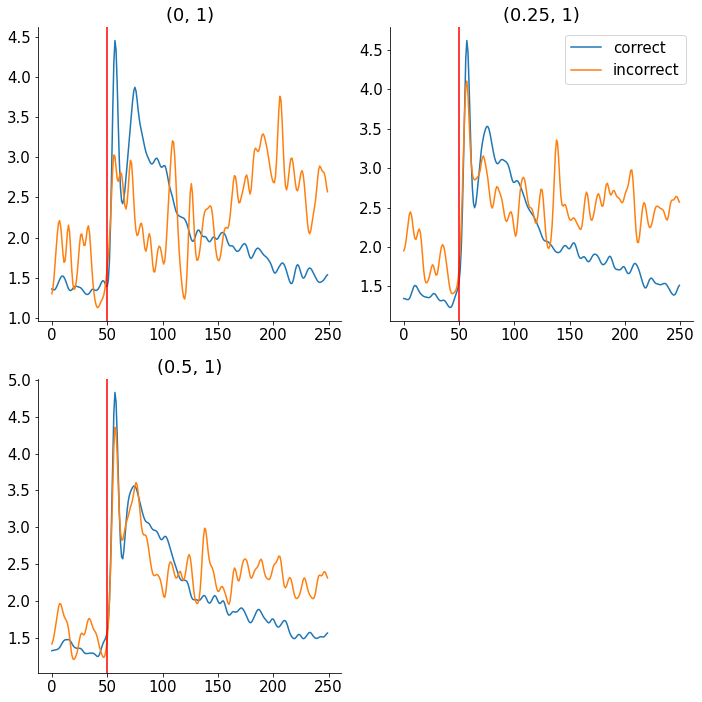

In [60]:
gaussfilter = True
gauss_sigma = 2
selected_regions = ["VISp"]

preference_components_rates = [] # mean response to right stim, mean response to left stim
correct_examples = [] # Append corresponding results from different conditions to this list
incorrect_examples = [] # Append corresponding results from different conditions to this list
contrast_combinations = [(0,1),(0.25,1),(0.5,1)]
plt.figure(figsize=[10, 10])
for ind_cont,cont in enumerate(contrast_combinations):
  for dat in alldat:

    # get important variables from specific experiment
    dt = dat['bin_size']
    response = dat['response'] # correct responses to right stim, nogo, left stim: -1, 0, 1
    vis_right = dat['contrast_right']
    vis_left = dat['contrast_left']
    N_neurons, N_trials, N_timebins  = dat['spks'].shape

    # find neurons indices from selected area
    neurons_indices_in_area = select_by_areas(dat, selected_regions = selected_regions)

    # selected trials per contrast level and response
    right_stim_correct_trials = select_trials(dat, contrast_pair=cont, response_type='to_left')
    right_stim_incorrect_trials   = select_trials(dat,contrast_pair=cont, response_type='to_right')

    #left_stim_correct_trials = select_trials(dat,contrast_pair=(1,0), response_type='to_right')
    #left_stim_wrong_trials   = select_trials(dat,contrast_pair=(1,0), response_type='to_left')

    #right_stim_trials = select_by_contrast(dat, contrast_pair=(0,1))
    #left_stim_trials  = select_by_contrast(dat, contrast_pair=(1,0))

    # find mean firing rates across trials for Right Stimulus
    correct_right_trace   = calculate_mean_firing_rate(dat['spks'][neurons_indices_in_area][:,right_stim_correct_trials], dt, ['trials'], gaussfilter = gaussfilter, gauss_sigma = gauss_sigma)
    incorrect_right_trace = calculate_mean_firing_rate(dat['spks'][neurons_indices_in_area][:,right_stim_incorrect_trials], dt, ['trials'], gaussfilter = gaussfilter, gauss_sigma = gauss_sigma)
    
    correct_examples.append(correct_right_trace)
    incorrect_examples.append(incorrect_right_trace)
  
  allmice_correct   = np.vstack(correct_examples)
  allmice_incorrect = np.vstack(incorrect_examples)


  plt.subplot(2, 2, ind_cont+1)
  plt.plot(np.nanmean(allmice_correct,   axis = 0), label='correct')
  plt.plot(np.nanmean(allmice_incorrect, axis = 0), label='incorrect')
  plt.axvline(x=50, color = 'red')
  plt.title(cont)
plt.subplot(2,2,2)
plt.legend()
plt.savefig('Outcome_dependent_v1_activity.png')


In [50]:
allmice_correct   = np.vstack(correct_examples)
allmice_incorrect = np.vstack(incorrect_examples)

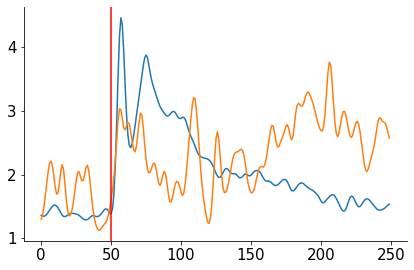

In [53]:
plt.plot(np.nanmean(allmice_correct,axis = 0))
plt.plot(np.nanmean(allmice_incorrect,axis = 0))


plt.axvline(x=50, color = 'red')

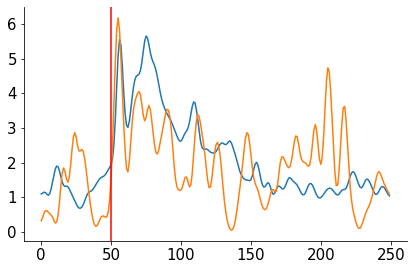

In [43]:
plt.plot(np.mean(correct_examples[7],axis = 0))
plt.plot(np.mean(incorrect_examples[7],axis = 0))


plt.axvline(x=50, color = 'red')




In [47]:
print(np.mean(correct_examples[7][...,50:60], axis = (0,1)))
print(np.mean(incorrect_examples[7][...,50:60], axis = (0,1)))

print(np.mean(correct_examples[7][...,60:120], axis = (0,1)))
print(np.mean(incorrect_examples[7][...,60:120], axis = (0,1)))


3.890084859644692
4.2712675600240555
3.6670322388217147
2.607912008719209


In [ ]:
plt.boxplot()